# Homework 7: Linear models.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
rng = np.random.default_rng(123)

# 1. Correlation correlation

If $X$ and $Z$ are independent, random Normal with mean 0 and standard deviation 1, 
and
$$\begin{aligned}
    Y = rX + \sqrt{1 - r^2} Z
\end{aligned}$$
then
$$ \text{cor}[X, Y] = r . $$

*(a)* Show that this is true, using math.

*(b)* For each of 16 values of $r$ evenly spaced between -1 and 1,
simulate 100 draws from a bivariate distribution with correlation $r$.
(You should get, for each $r$, 100 pairs $(x_i, y_i)$.)
Use these to make a plot like the following (but with four rows and columns),
with one scatter plot for each simulation, having the minimum-MSE line superimposed,
and both the theoretical and observed correlation in the title.
<img src="images/ex_scatter.png" alt="image of example plots" style="width: 400px;"/>


**Response To Part A**
Prove the following: $\text{Cor}[X,Y] = r$ if $X$ and $Z$ = normal(0,1), are independent and $\ Y = rX + \sqrt{1 - r^2} Z $

Recall that $\ \text{cor}[X, Y]
    =
    \frac{
        \text{cov}[X, Y]
    }{
        \text{sd}[X] \text{sd}[Y]
    }  $

Substituting for y we find: cor[x,y] = $\frac{\text{cov}[X, rX +\sqrt{1-r^2}Z]}{\text{sd}(X) * \text{sd}(Y)} $

Working with the numerator only, we can split the covariance up as follows: $\text{cov}(X,rX) + \text{cov}(X, \sqrt{1-r^2}Z) $

By the properties of bilinearity we can "pull" out the $r$ from the first term, and the $\sqrt{1-r^2}$ from the second term: $r*\text{cov}(X,X) + \sqrt{1-r^2}\text{cov}(X,Z)$

The covariance between X and X is one, because it's really the variance of X, which has a sd of 1. We also know the $\text{cov}(X,Z)$ is 0 because they are independent. This simplfies our numerator to: $r * 1 + 0 * \sqrt{1-r^2} = r$

Now to work with our denominator, we can realize that the $\text{sd}(X)$ will be 1, so lets find the $\text{sd}(Y)$ and divide $r$ by it. To find the $\text{sd}(Y)$, we will first work with the variance: $\text{var}(Y) = \text{var}(rX + \sqrt{1-r^2}Z) $

We are then allowed to split these, and pull the variables out the squared scalars as follows: $r^2 * \text{var}(X) + 1-r^2 * \text{var}(Z)$

As $\text{var}(X)$ and $\text{var}(Z)$ are both one the denominator simplifies to: $r^2 + 1-r^2 = 1$

As our denominator is 1, and our numerator is $r$, we have sucessfully proven that the $\text{Cor}[x,y]$ = $r$, if X and Z = normal(0,1), are independent and $\ Y = rX + \sqrt{1 - r^2} Z $

**Explanation for part B**
were just going to make a function to simulate some example points using the equation of $Y = rX + \sqrt{1-r^2}Z $. This function will return 100 sample scatterplot points when passed in with a given r value. Then were going to call np.linspace to create 16 evenly spaced r-values between -1 and 1. Finally were going to graph all of these r-values and there sample points following said directions

**Code to Part B**

In [14]:
def sim_r(r):
    X = rng.normal(0,1, size = 100)
    Z = rng.normal(0,1, size = 100)
    y = r * X + np.sqrt(1-r**2) * Z
    return X,y
x,y = sim_r(.75)


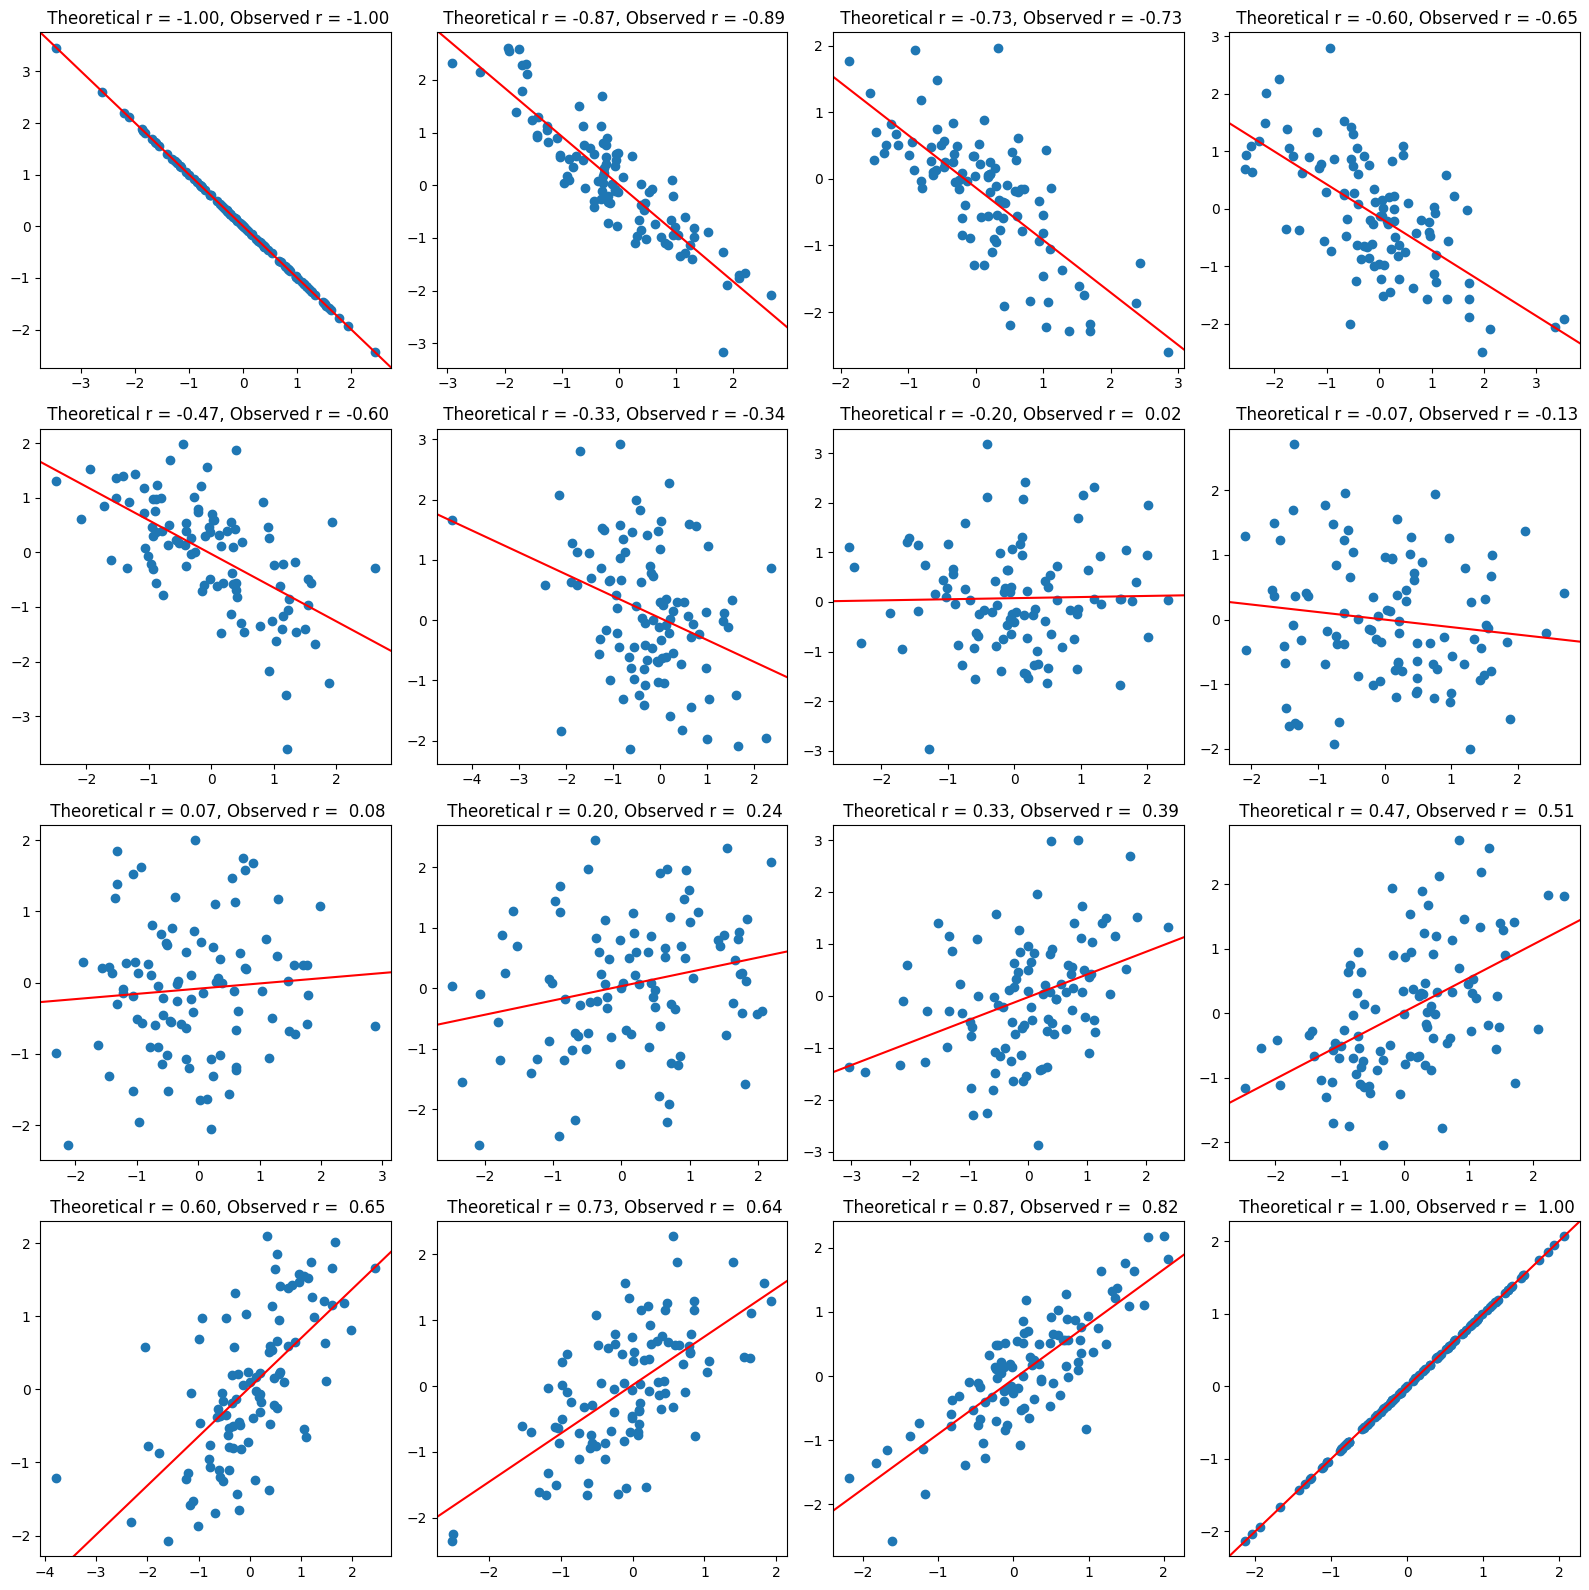

In [15]:
r_values = np.linspace(-1,1,num = 16)

fig, axes = plt.subplots(4,4,figsize = (16,16))

for r, ax in zip(r_values, axes.flatten()):
    simmed_x, simmed_y = sim_r(r)
    
    mse_slope = np.std(simmed_y) * np.corrcoef(simmed_x,simmed_y)[0,1] / np.std(simmed_x)  #Code taken and abstracted from lab
    ax.axline(xy1=(np.mean(simmed_x), np.mean(simmed_y)), slope = mse_slope, color='red') #code taken and abstracted from lab
    
    ax.scatter(simmed_x, simmed_y)
    ax.set_title(f" Theoretical r = {r:.2f}, Observed r = {np.corrcoef(simmed_x,simmed_y)[0,1]: .2f}")

plt.tight_layout()

# 2. I want candy!

Researchers are planning a study on the effect of children on consumer behavior.
In the study, they plan to will record the purchases made by each participants
in a month of shopping,
and are interested in how the amount spent on candy and other sweets
is correlated with the number of children who come along on shopping trips. 
They have enrolled 65 parents in the study,
with the following numbers of accompanying children:

In [4]:
num_children = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

# (Some are zero, for instance, if they *have* children but none come along when shopping.)

However, they are worried that this small sample size will
not allow them to reliably estimate the effect of interest.
Your task is to assess this question, by simulation:

*(a)* Write a function that simulates the amount of sweets purchased
    from the following model, where $D_i$ is the amount of sweets (in dollars)
    and $C_i$ is the number of children of the $i^\text{th}$ parent:
    $$\begin{aligned}
        X_i &\sim \text{Normal}(\text{mean}= 1 + 5 C_i, \text{sd}=3 C_i) \\
        D_i &= \max(0, X_i) .
    \end{aligned}$$

*(b)* Simulate one data set, and fit a linear model to these data
    to predict how the average amount spent on sweets
    depends on the number of children.
    You should fit a standard ("least squares") linear model,
    using either of the methods shown in class:
    scikit-learn or direct use of the formula.
    Plot the data with the estimated line on top.
    *(Note: since the SD of $X$ depends on $C$, the standard linear model
    is not the optimal method; our job here is to see how well it does in practice.)*
 
*(c)* Your result in (b) should have given you estimates of the average amount
    spent with no children (the intercept), and 
    that the amount increases by, per additional child (the slope).
    Do the same thing for at least 100 simulated datasets,
    and make histograms of the resulting estimated slopes and intercepts.
    How well are these estimated?

**Response to Part A and B**
What were going to do is create a function that predicts the amount of dollars of sweets that a parent would purchase. It's going to take an array representing the amount of children that come shopping as an input, and return a simulation of the amount that each parent would spend. Now to use said data set, were then going to fit a linear model (copying the code from lab).

In [5]:
#code to part A 
def purchase_predictor(children_array):
    sweet_arr = np.empty(0)
    for val in children_array:
        x = np.round(rng.normal(1 + (5*val), 3*val),2)
        di = np.max((0,x))
        sweet_arr = np.append(sweet_arr, di)
    return sweet_arr


The MSE slope is: 5.20, The intercept is:  0.35


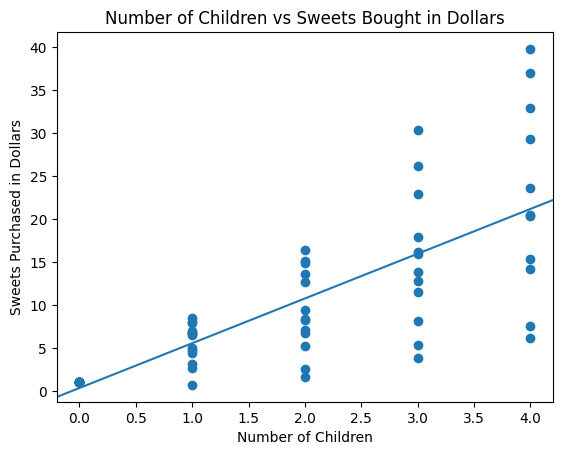

In [6]:
#Code to part B
simmed_purchase = purchase_predictor(num_children)
plt.scatter(num_children, simmed_purchase)
plt.xlabel("Number of Children")
plt.ylabel("Sweets Purchased in Dollars")
plt.title("Number of Children vs Sweets Bought in Dollars")

#Calculating the MSE 
mse_slope_sweet = np.std(simmed_purchase) * np.corrcoef(num_children, simmed_purchase)[0,1] / np.std(num_children)
mse_intercept_sweet = np.mean(simmed_purchase) - np.mean(num_children) * mse_slope_sweet
plt.axline(xy1=(np.mean(num_children),np.mean(simmed_purchase)), slope = mse_slope_sweet)

print(f"The MSE slope is: {mse_slope_sweet:.2f}, The intercept is: {mse_intercept_sweet: .2f}") 

**Explanation for Part C**
For the code explanation, were just going to simulate this 100 times and then find the slopes and intercepts and make histograms as per usual. 

When we think about what the intercept should be, it should be 1. This is because by our model, if there are 0 children, the mean is still 1, while the standard deviation becomes 0, then predicting 0 dollars. After looking at the results for the intercepts (below), I think the model did a reasonable job. It certainly wasn't perfect because with a little bit of thinking it should always be 1. It also should never be negative because that would imply that the candy store paid people to come in. As far as slopes go, it looks like it also did a reasonble job. You would expect it to go up by 5 because means are additive, and with every additional kid our model predicts 5 more dollars spent. Given that it is roughly centered around 5 it looks reasonable.

Text(0.5, 0, 'Intercept Values')

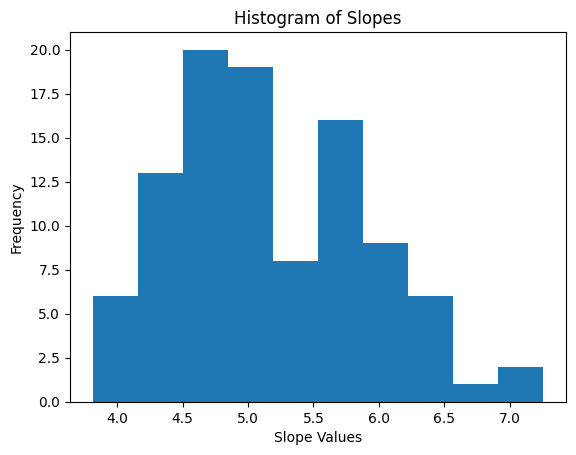

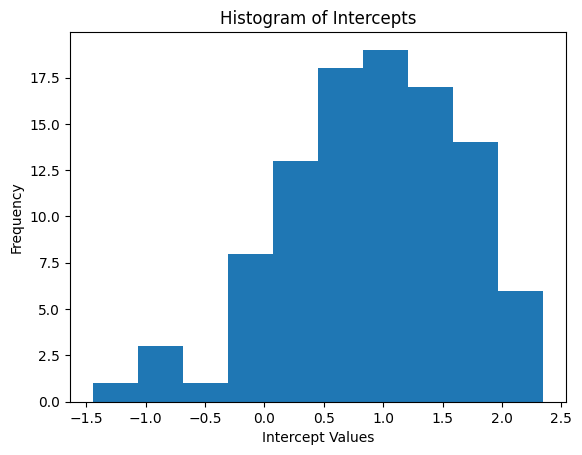

In [7]:
sweet_intercepts = np.empty(0)
sweet_slopes = np.empty(0)
for i in range(100):
    sim = purchase_predictor(num_children)
    slope =  np.std(sim) * np.corrcoef(num_children, sim)[0,1] / np.std(num_children)
    sweet_slopes = np.append(sweet_slopes, slope)
    sweet_intercepts = np.append(sweet_intercepts, np.mean(sim) - np.mean(num_children) * slope)

plt.hist(sweet_slopes)
plt.title("Histogram of Slopes")
plt.ylabel("Frequency")
plt.xlabel("Slope Values")
plt.subplots()
plt.hist(sweet_intercepts)
plt.title("Histogram of Intercepts")
plt.ylabel("Frequency")
plt.xlabel("Intercept Values")

# 3. More mosquitos

Recall the mosquito bite data from HW4:
here are the numbers of mosquito bites that 27 kids
got on a camping trip:

In [8]:
bites = np.array([4, 5, 4, 2, 4, 8, 4, 6, 7, 5, 4, 0, 5, 7, 5, 3, 2, 0, 3, 4, 5, 3, 6, 1, 2, 3, 5])

Now, we have more data: a parent has measured the concentration
of some volatile organics in each kids' breath.
Here are the concentrations for the 27 kids (in the same order as `bites`, above),
in units of parts per million (ppm):

In [9]:
odor = np.array([ 2.8,  4.4,  6.9,  2.3,  5.9, 10.2,  3.2,  7.6,  6.3,  4.5,  4.3,
                0. ,  8.2,  5.4,  7.6,  3.3,  3.9,  0.1,  2.7,  4.7,  2.1,  4.3,
               11.3,  1.7,  2.8,  2.9,  8.5])


Our goal is to determine how odor affects the number of bites.
To do this, we'll fit a *Poisson* model:
if $Y_i$ is the number of bites the $i^\text{th}$ kid got,
and $X_i$ is their "odor" value, then we want to fit:
$$\begin{aligned}
    Y_i \sim \text{Poisson}(\text{mean}= \exp(a X_i + b)) ,
\end{aligned}$$
i.e., find the values of $a$ and $b$ at which this model
best fits the data.
To do this:

*(a)* Write a likelihood function: this should take $a$ and $b$ as arguments,
and return the negative log likelihood of the data (i.e., of `odor` and `bites`)
under the model above.

*(b)* Use your function from (a) and `scipy.optimize.minimize` to find
    the maximum likelihood estimates of $a$ and $b$.

*(c)* Plot the data, with number of bites against odor,
    and add the line showing how expected number of bites increases with odor.

In [10]:
#reference code from hw 4:
def beta_log(alpha, beta_data):
        lpdfs = beta.logpdf(burned, a=alpha, b=beta_data)
        return np.sum(lpdfs)
    
def beta_mle(): #code taken from the slides and from lab
    def logL(alpha, beta_data):
        lpdfs = beta.logpdf(burned, a=alpha, b=beta_data)
        return np.sum(lpdfs)
    
    max_L = minimize(lambda x: -logL(*x), x0=(5,1))
    mle_alpha, mle_beta = max_L['x']
    return mle_alpha, mle_beta


#This code is not used or called anywhere, placeholder to model a mle function for our situation.

**Explanation for Part A and B**
Were just going to use code from hw 4 that details how to minimize and find maximum likelihood estimates. Were going to minimize the negative log likelihood, with parameters $a$ and $b$. 



In [11]:
#Code for Part A and B
from scipy.stats import poisson
from scipy.optimize import minimize
def negative_log_likelihood(a, b):
    poisson_mean = np.exp(a * odor + b)
    log_likelihood = poisson.logpmf(bites, mu=poisson_mean)
    return -np.sum(log_likelihood)  #returns the negative log likelihood 

max_l = minimize(lambda x: negative_log_likelihood(*x), x0 = (.5,.5))
max_a, max_b = max_l['x'][0], max_l['x'][1]
max_a,max_b

(0.12940533529419368, 0.6948373864415038)

**Response to Part C**
Were going to now fit an exponential line to this graph. To do this were going to call np.linspace to create artificial x-values, and it needs to be large enough to make the line feel like a "line". Then were going to run all of those points through out equation exp(max_a * x + max_b) because the expected poisson value is at that value. Finally we just graph x and y :)

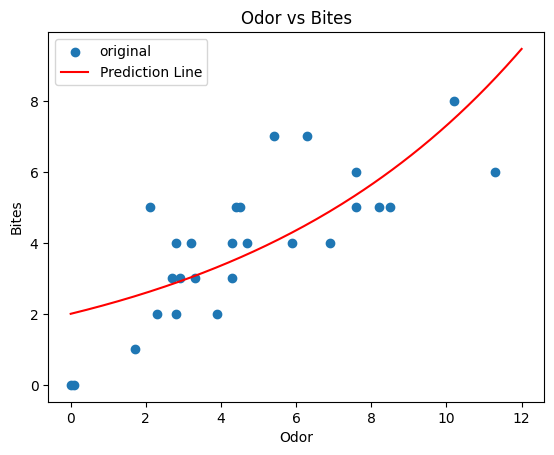

In [12]:
#Code to graph for part C
#sample_bites = rng.poisson(np.exp(max_a * odor + max_b))
#plt.scatter(odor, sample_bites, label = "predicted") Not necessary, was interested

plt.scatter(odor,bites, label = "original")
plt.ylabel("Bites")
plt.xlabel("Odor")
plt.title("Odor vs Bites")
plt.legend()

x_prediction = np.linspace(0,12,144)
y_prediction = np.exp(max_a * x_prediction + max_b)
plt.plot(x_prediction,y_prediction, label = "Prediction Line", color = 'red')
plt.legend()